In [ ]:
%#TODO:

#Try PMA earlier
#Try Best PMA with optical flow
#Try more iterations of XCA (remove threshold)

## View Aligned Projections

In [3]:
pwd

'/sdf/data/lcls/ds/xpp/xppl1026722/results/LH_Tomography/TomoMono'

In [1]:
from helperFunctions import MoviePlotter
import time
import sys
import tomoDataClass
from tiffConverter import convert_to_numpy, convert_to_tiff
from datetime import datetime
import torch
import argparse
from helperFunctions import DualLogger, subpixel_shift
from tqdm import tqdm
from scipy.ndimage import shift
import numpy as np
import tomopy
import matplotlib.pyplot as plt

In [9]:
aligned_proj_location = "alignedProjections/aligned_baseCase_Filter_XCtip_20241004-100555.tif"
kevinProjections, kevin_proj_scale_info = convert_to_numpy(aligned_proj_location)

MoviePlotter(kevinProjections)

Output()

In [11]:
aligned_proj_location = "alignedProjections/aligned_baseCase_XCRatio1_PMA_20250311-201309.tif"
kevinProjections, kevin_proj_scale_info = convert_to_numpy(aligned_proj_location)
# plt.imshow(kevinProjections[0])
# plt.show()

MoviePlotter(kevinProjections)

# aligned_proj_location = "alignedProjections/aligned_baseCase_XCRatio1_20250305-123331.tif"
# kevinProjections, kevin_proj_scale_info = convert_to_numpy(aligned_proj_location)
# # plt.imshow(kevinProjections[0])
# # plt.show()

# MoviePlotter(kevinProjections)

Output()

## Align

In [ ]:
cd ..

In [ ]:
import time
import sys
import tomoDataClass
from tiffConverter import convert_to_numpy, convert_to_tiff
from datetime import datetime
import torch
import argparse
from helperFunctions import DualLogger, subpixel_shift
from tqdm import tqdm
from scipy.ndimage import shift
import numpy as np
import tomopy
import matplotlib.pyplot as plt

# Import foam data
tif_file = "data/fullTomoReconstructions_3_3_25.tif"
obj, scale_info = convert_to_numpy(tif_file)

In [ ]:
timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")  # Timestamp for file naming

print(obj.shape)
tomo = tomoDataClass.tomoData(obj[::20])

#Actually align data
""" Choose whatever alignment algorithms you want to use. Options include:
- cross_correlate_align
- rotate_correlate_align
- vertical_mass_fluctuation_align
- tomopy_align (joint reprojection algorithm)
- optical_flow_align
- center_projections"""

print("Starting alignment")

# #Base Case with Filter
tomo.reset_workingProjections()
tomo.track_shifts()
# tomo.bilateralFilter()
tomo.standardize()

ratio = 1
print("Starting alignment")
tomo.cross_correlate_align(tolerance=0.5, max_iterations = 3, stepRatio = ratio)
tomo.center_projections()
# tomo.cross_correlate_tip(tolerance=0.1, max_iterations = 10, stepRatio = ratio)
tomo.make_updates_shift()
tomo.makeNotebookProjMovie()

tomo.rotate_correlate_align()
tomo.make_updates_rotate()


# tomo.cross_correlate_align(tolerance=0.5, max_iterations=20, stepRatio = ratio)
# tomo.center_projections()
# tomo.cross_correlate_tip(tolerance=0.1, max_iterations = 10, stepRatio = ratio)
tomo.makeNotebookProjMovie()


# tomo.make_updates_shift()
# tomo.unrotate()
# tomo.makeNotebookProjMovie()


# convert_to_tiff(tomo.get_finalProjections(), f"alignedProjections/aligned_baseCase_Filter_XCtip_{timestamp}.tif", scale_info)


In [ ]:
# tomo.make_updates_shift()
tomo.unrotate()
tomo.makeNotebookProjMovie()

## Optical Flow Experiment

In [ ]:
tomo = tomoDataClass.tomoData(obj)

# #Base Case with Filter
tomo.reset_workingProjections()
tomo.track_shifts()
# tomo.bilateralFilter()
tomo.standardize()

ratio = 1
print("Starting alignment")
tomo.cross_correlate_align(tolerance=0.5, max_iterations = 10, stepRatio = ratio)
tomo.center_projections()
tomo.PMA(iterations=2)
tomo.make_updates_shift()
tomo.makeNotebookProjMovie()

## PMA Explore

In [1]:
cd ..

/sdf/data/lcls/ds/xpp/xppl1026722/results/LH_Tomography/TomoMono


In [1]:
import time
import sys
import tomoDataClass
from tiffConverter import convert_to_numpy, convert_to_tiff
from datetime import datetime
import torch
import argparse
from helperFunctions import DualLogger, subpixel_shift
from tqdm import tqdm
from scipy.ndimage import shift
import numpy as np
import tomopy
import matplotlib.pyplot as plt

In [2]:
# #Import model data
# numAngles = 800
# shepp3d = tomopy.shepp3d(size=128)
# ang = tomopy.angles(nang=numAngles, ang1=0, ang2=360)
# obj = tomopy.project(shepp3d, ang, pad=False)
# obj = tomopy.sim.project.add_gaussian(obj)
# tomo = tomoDataClass.tomoData(obj)
# tomo.jitter(multiplier=15)

tif_file = "data/fullTomoReconstructions_3_3_25.tif"
obj, scale_info = convert_to_numpy(tif_file)
print(obj.shape)
obj = obj[::40,:,:]

print(obj.shape)
tomo = tomoDataClass.tomoData(obj)

# #Base Case with Filter
# tomo.reset_workingProjections(obj[0].shape[0], obj[0].shape[1])
tomo.reset_workingProjections()
tomo.track_shifts()
# tomo.bilateralFilter()
tomo.standardize()

tomo.makeNotebookProjMovie()

(800, 720, 1100)
(20, 720, 1100)


Cropping projections to size: 900x650: 100%|██████████| 20/20 [00:00<00:00, 527.04it/s]


Output()

Cropping projections to size: 900x650: 100%|██████████| 20/20 [00:00<00:00, 535.44it/s]


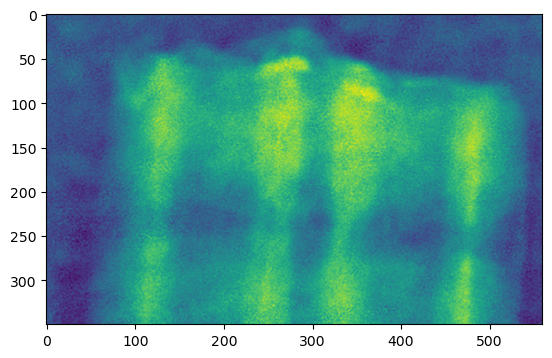

Cross-Correlation Alignment Iterations:   5%|▌         | 1/20 [00:02<00:52,  2.76s/it]


Average pixel shift of iteration 1: 25.105077522949603



Cross-Correlation Alignment Iterations:  10%|█         | 2/20 [00:05<00:47,  2.65s/it]


Average pixel shift of iteration 2: 2.954138126514911



Cross-Correlation Alignment Iterations:  10%|█         | 2/20 [00:07<01:09,  3.89s/it]



Average pixel shift of iteration 3: 0.1
Convergence reached after 3 iterations.
Maximum iterations reached without convergence.


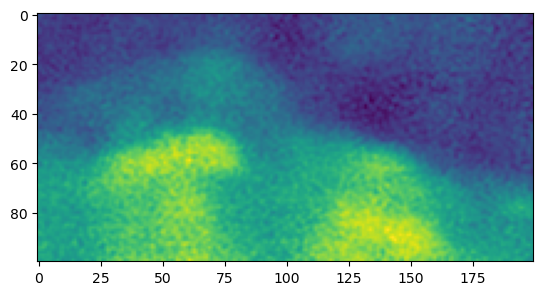

Cross-Correlation of pillar tip Iterations:  10%|█         | 1/10 [00:01<00:17,  1.92s/it]


Average pixel shift of iteration 1: 9.4



Cross-Correlation of pillar tip Iterations:  20%|██        | 2/10 [00:03<00:15,  1.95s/it]


Average pixel shift of iteration 2: 2.4



Cross-Correlation of pillar tip Iterations:  30%|███       | 3/10 [00:05<00:13,  1.88s/it]


Average pixel shift of iteration 3: 1.6



Cross-Correlation of pillar tip Iterations:  40%|████      | 4/10 [00:07<00:11,  1.88s/it]


Average pixel shift of iteration 4: 0.8



Cross-Correlation of pillar tip Iterations:  50%|█████     | 5/10 [00:09<00:09,  1.86s/it]


Average pixel shift of iteration 5: 0.3



Cross-Correlation of pillar tip Iterations:  50%|█████     | 5/10 [00:11<00:11,  2.23s/it]



Average pixel shift of iteration 6: 0.05
Convergence reached after 6 iterations.
Maximum iterations reached without convergence.
Finding center of rotation for projections
Original center: 419.5
Center of frame: 450


Center projections: 100%|██████████| 20/20 [00:02<00:00,  9.09it/s]


Aligned projections shifted by 30.5 pixels
Projections are currently centered at pixel 449.75
But it is still offset by 0.25 pixels


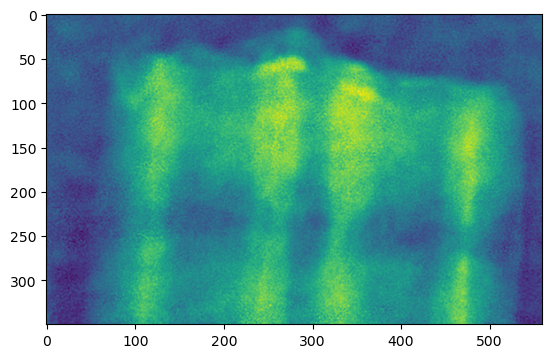

PMA Algorithm iterations:  20%|██        | 1/5 [00:22<01:28, 22.07s/it]


Average pixel shift of iteration 0: 1.2
Average x shift of iteration 0: 1.2
Average y shift of iteration 0: 0.0


PMA Algorithm iterations:  40%|████      | 2/5 [00:45<01:09, 23.07s/it]


Average pixel shift of iteration 1: 0.65
Average x shift of iteration 1: 0.65
Average y shift of iteration 1: 0.0


PMA Algorithm iterations:  60%|██████    | 3/5 [01:08<00:45, 22.94s/it]


Average pixel shift of iteration 2: 0.3
Average x shift of iteration 2: 0.3
Average y shift of iteration 2: 0.0


PMA Algorithm iterations:  60%|██████    | 3/5 [01:33<01:02, 31.05s/it]


Average pixel shift of iteration 3: 0.0
Average x shift of iteration 3: 0.0
Average y shift of iteration 3: 0.0
Convergence reached after 4 iterations.
Finding center of rotation for projections


Original center: 449.0
Center of frame: 450


Center projections: 100%|██████████| 20/20 [00:02<00:00,  9.80it/s]


Aligned projections shifted by 1.0 pixels
Projections are currently centered at pixel 449.75
But it is still offset by 0.25 pixels


Apply shifts to final projections: 100%|██████████| 20/20 [00:02<00:00,  9.67it/s]


Output()

In [3]:
tomo.reset_workingProjections()
tomo.track_shifts()
# tomo.bilateralFilter()
tomo.standardize()

ratio = 1
plt.imshow(tomo.workingProjections[12][200:-100,170:-170])
plt.show()
tomo.cross_correlate_align(tolerance=0.5, max_iterations = 20, stepRatio = ratio)

plt.imshow(tomo.workingProjections[12][200:300, 350:-350])
plt.show()
tomo.cross_correlate_tip(tolerance=0.1, max_iterations = 10, stepRatio = ratio)

tomo.center_projections()

plt.imshow(tomo.workingProjections[12][200:-100,170:-170])
plt.show()
tomo.PMA(max_iterations = 5, tolerance=0.1, algorithm="art")

tomo.make_updates_shift()
tomo.makeNotebookProjMovie()

### Threshold

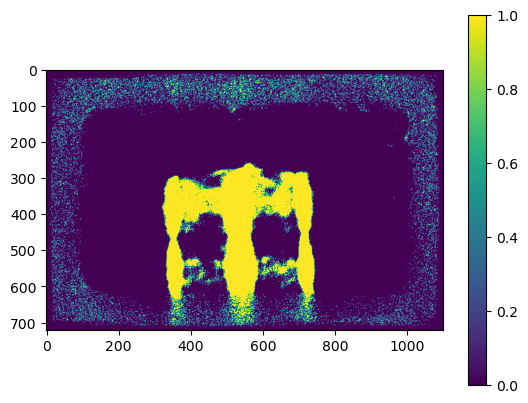

(800, 720, 1100)
(40, 720, 1100)


Cross-Correlation Alignment Iterations:   7%|▋         | 1/15 [00:06<01:34,  6.76s/it]


Average pixel shift of iteration 1: 36.06686754718609



Cross-Correlation Alignment Iterations:  13%|█▎        | 2/15 [00:13<01:27,  6.77s/it]


Average pixel shift of iteration 2: 8.150328691156432



Cross-Correlation Alignment Iterations:  20%|██        | 3/15 [00:20<01:20,  6.67s/it]


Average pixel shift of iteration 3: 2.0



Cross-Correlation Alignment Iterations:  27%|██▋       | 4/15 [00:26<01:12,  6.62s/it]


Average pixel shift of iteration 4: 2.0



Cross-Correlation Alignment Iterations:  33%|███▎      | 5/15 [00:33<01:06,  6.64s/it]


Average pixel shift of iteration 5: 2.0



Cross-Correlation Alignment Iterations:  40%|████      | 6/15 [00:39<00:59,  6.61s/it]


Average pixel shift of iteration 6: 2.0



Cross-Correlation Alignment Iterations:  47%|████▋     | 7/15 [00:46<00:52,  6.59s/it]


Average pixel shift of iteration 7: 2.0



Cross-Correlation Alignment Iterations:  53%|█████▎    | 8/15 [00:53<00:46,  6.60s/it]


Average pixel shift of iteration 8: 2.0



Cross-Correlation Alignment Iterations:  60%|██████    | 9/15 [00:59<00:39,  6.60s/it]


Average pixel shift of iteration 9: 2.0



Cross-Correlation Alignment Iterations:  67%|██████▋   | 10/15 [01:06<00:32,  6.60s/it]


Average pixel shift of iteration 10: 2.0



Cross-Correlation Alignment Iterations:  73%|███████▎  | 11/15 [01:12<00:26,  6.60s/it]


Average pixel shift of iteration 11: 2.0



Cross-Correlation Alignment Iterations:  80%|████████  | 12/15 [01:19<00:19,  6.61s/it]


Average pixel shift of iteration 12: 2.0



Cross-Correlation Alignment Iterations:  87%|████████▋ | 13/15 [01:26<00:13,  6.59s/it]


Average pixel shift of iteration 13: 2.0



Cross-Correlation Alignment Iterations:  93%|█████████▎| 14/15 [01:32<00:06,  6.58s/it]


Average pixel shift of iteration 14: 2.0



Cross-Correlation Alignment Iterations: 100%|██████████| 15/15 [01:39<00:00,  6.61s/it]



Average pixel shift of iteration 15: 2.0
Maximum iterations reached without convergence.


Apply shifts to final projections: 100%|██████████| 40/40 [00:06<00:00,  5.91it/s]


Output()

In [3]:
tif_file = "data/fullTomoReconstructions_3_3_25.tif"
obj, scale_info = convert_to_numpy(tif_file)

plt.imshow(obj[0]<-0.1)
plt.colorbar()
plt.show()

print(obj.shape)
obj = obj[:40,:,:]

print(obj.shape)
tomo = tomoDataClass.tomoData((obj<-0.1).astype(float))
# tomo = tomoDataClass.tomoData(obj)
tomo.reset_workingProjections()
tomo.cross_correlate_align(tolerance=0.5, max_iterations=15)
tomo.make_updates_shift()
tomo.makeNotebookProjMovie()

## Test more stuff

In [1]:
import time
import sys
import tomoDataClass
from tiffConverter import convert_to_numpy, convert_to_tiff
from datetime import datetime
import torch
import argparse
from helperFunctions import DualLogger, subpixel_shift
from tqdm import tqdm
from scipy.ndimage import shift
import numpy as np
import tomopy
import matplotlib.pyplot as plt


# Configuration flags
log = False  # Enable logging to file
saveToFile = True  # Enable saving data to file

# Start the timer for execution duration tracking
start_time = time.time()
timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")  # Timestamp for file naming
print("timestamp: ", timestamp)


# Setup logging if enabled
if log:
    sys.stdout = DualLogger(f'logs/output_tomoMono_align{timestamp}.txt', 'w')


print("Running Image Registration Script")


# Import foam data
tif_file = "data/fullTomoReconstructions_3_3_25.tif"
# tif_file = "data/fullTomoReconstructions_8_28_24.tif"
obj, scale_info = convert_to_numpy(tif_file)

timestamp:  20250423-093308
Running Image Registration Script


(800, 720, 1100)
Creating aligned Projections:  alignedProjections/aligned_baseCase_OldShifts_PMA_test20250423-093308.tif


Apply shifts to final projections: 100%|██████████| 800/800 [17:23<00:00,  1.30s/it]


Cropping projections to size: 750x500


PMA Algorithm iterations:   0%|          | 0/1 [00:00<?, ?it/s]

Output()

(500, 750)


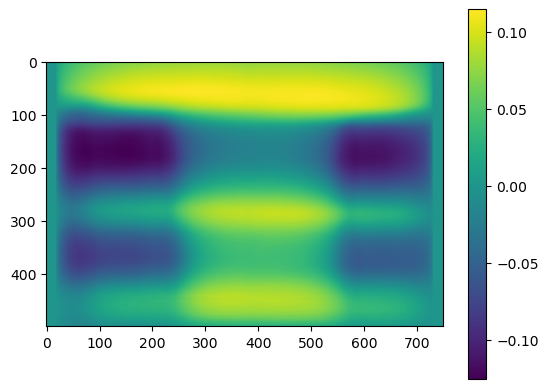

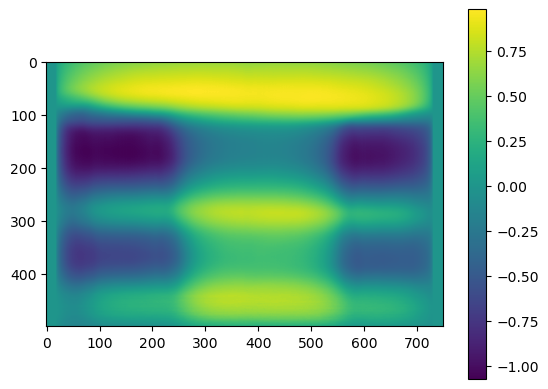

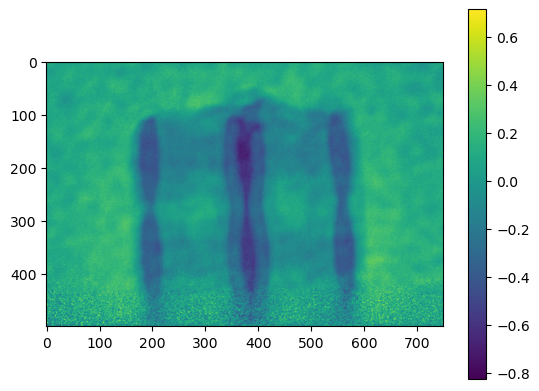



-309 6


PMA Algorithm iterations: 100%|██████████| 1/1 [59:57<00:00, 3597.52s/it]


Average pixel shift of iteration 0: 293.4880853188688
Average x shift of iteration 0: 293.45
Average y shift of iteration 0: 3.30125
Finding center of rotation for projections


Original center: 373.0
Center of frame: 375


In [ ]:
import tomoDataClass


print(obj.shape)
tomo = tomoDataClass.tomoData(obj)


name = f"alignedProjections/aligned_baseCase_OldShifts_PMA_test{timestamp}.tif"
print("Creating aligned Projections: ", name)
tomo.reset_workingProjections()
tomo.tracked_shifts = np.loadtxt('alignedProjections/OGShifts_fromToryRecons.txt', dtype=int)
tomo.make_updates_shift()

tomo.PMA(max_iterations = 1, tolerance=0.01, algorithm="SIRT_CUDA", crop_bottom_center_y = 500, crop_bottom_center_x = 750)
tomo.makeNotebookProjMovie()
# tomo.center_projections()
# tomo.make_updates_shift()